In [4]:
import librosa
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

PROCESSED_PATH = 'Processed/RAVDESS/'

In [8]:
os.path.isdir(PROCESSED_PATH + 'cleanspeech/')

True

In [3]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [12]:
df = pd.read_csv(PROCESSED_PATH + 'ravdessSpeech.csv')
df.set_index('FilePath', inplace=True)
for f in df.index:
    signal, rate = librosa.load(f, sr=16000) # downsampling to 16khz
    mask = envelope(signal, rate, 0.0005)
    new_signal = signal[mask]
    #Equivenlent lines
    librosa.output.write_wav(path=PROCESSED_PATH + 'cleanspeechlibrosa/' + df.at[f, 'Filename'], y=new_signal, sr=rate)
    #wavfile.write(filename=PROCESSED_PATH + 'cleanspeech/' + df.at[f, 'Filename'], rate=rate, data=new_signal)

In [13]:
filename = '03-01-03-02-01-02-09.wav'
signal, rate = librosa.load(filename, sr=16000) # downsampling to 16khz
mask = envelope(signal, rate, 0.0005)
new_signal = signal[mask]
#wavfile.write(filename='clean/' + f, rate=rate, data=signal[mask])

In [14]:
len(signal)

66734

In [15]:
len(new_signal)

46600

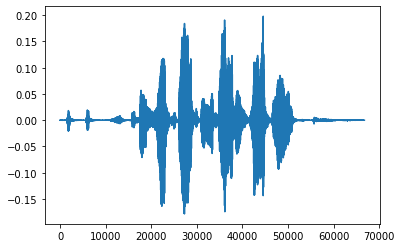

In [21]:
plt.plot(signal)

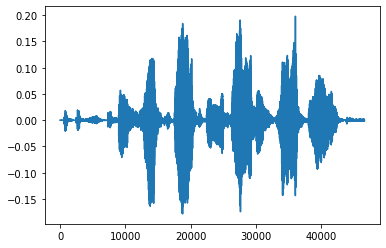

In [20]:
plt.plot(new_signal)

In [ ]:
if len(os.listdir('clean')) == 0:
    for f in tqdm(df.fname):
        signal, rate = librosa.load('wavfiles/' + f, sr=16000) # downsampling to 16khz
        mask = envelope(signal, rate, 0.0005)
        wavfile.write(filename='clean/' + f, rate=rate, data=signal[mask])